In [1]:
import pyupbit
from prophet import Prophet
import os

def predict_price(ticker="KRW-BTC", interval="minute60", count=200, period=24, freq='H'):
    df = pyupbit.get_ohlcv(ticker=ticker, interval=interval, count=count)
    df = df.reset_index()
    df['ds'] = df['index']
    df['y'] = df['close']
    data = df[['ds','y']]

    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=period, freq=freq)
    forecast = model.predict(future)
    return forecast[['trend', 'trend_lower','trend_upper']].iloc(-1)

In [37]:
df = pyupbit.get_ohlcv(ticker='KRW-BTC', interval='minute60', count=100, to=None)
df = df.asfreq('H')
df

,open,high,low,close,volume,value
2022-09-21 15:00:00,26774000.0,26861000.0,26664000.0,26746000.0,294.477138,7.875891e+09
2022-09-21 16:00:00,26746000.0,26850000.0,26687000.0,26850000.0,184.963647,4.954056e+09
2022-09-21 17:00:00,26836000.0,26836000.0,26666000.0,26698000.0,137.874381,3.684366e+09
2022-09-21 18:00:00,26706000.0,26850000.0,26670000.0,26801000.0,164.624952,4.401507e+09
2022-09-21 19:00:00,26813000.0,27024000.0,26760000.0,26980000.0,208.626336,5.609137e+09
...,...,...,...,...,...,...
2022-09-25 14:00:00,27296000.0,27334000.0,27250000.0,27297000.0,59.792756,1.631674e+09
2022-09-25 15:00:00,27297000.0,27369000.0,27290000.0,27348000.0,59.696360,1.631989e+09
2022-09-25 16:00:00,27349000.0,27445000.0,27315000.0,27393000.0,146.461579,4.011515e+09
2022-09-25 17:00:00,27393000.0,27425000.0,27389000.0,27396000.0,93.260632,2.556220e+09


In [38]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-21 15:00:00,26746000.0
1,2022-09-21 16:00:00,26850000.0
2,2022-09-21 17:00:00,26698000.0
3,2022-09-21 18:00:00,26801000.0
4,2022-09-21 19:00:00,26980000.0
...,...,...
95,2022-09-25 14:00:00,27297000.0
96,2022-09-25 15:00:00,27348000.0
97,2022-09-25 16:00:00,27393000.0
98,2022-09-25 17:00:00,27396000.0


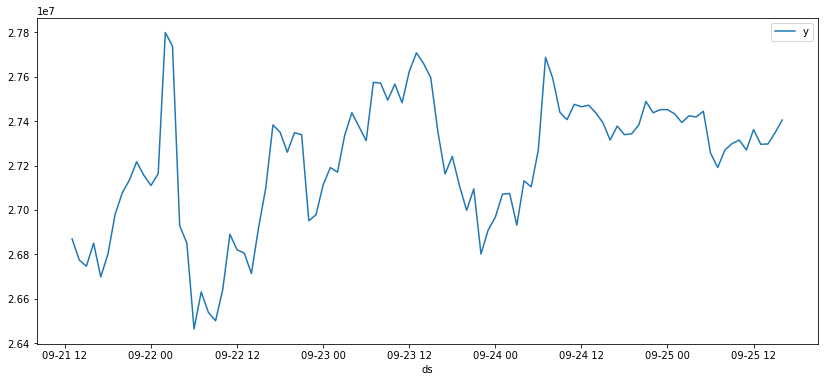

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data.set_index('ds').asfreq('H')
plt.figure(figsize=(14,6))
sns.lineplot(data=data)
plt.show()

In [39]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [21]:
forecast = forecast.set_index('ds')

In [23]:
forecast = forecast.asfreq('H')

In [34]:
forecast

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-09-21 13:00:00,2.672358e+07,2.655260e+07,2.697915e+07,2.672358e+07,2.672358e+07,44656.482463,44656.482463,44656.482463,44656.482463,44656.482463,44656.482463,0.0,0.0,0.0,2.676824e+07
2022-09-21 14:00:00,2.676614e+07,2.660009e+07,2.702756e+07,2.676614e+07,2.676614e+07,56912.142511,56912.142511,56912.142511,56912.142511,56912.142511,56912.142511,0.0,0.0,0.0,2.682305e+07
2022-09-21 15:00:00,2.680869e+07,2.663670e+07,2.706347e+07,2.680869e+07,2.680869e+07,34908.423195,34908.423195,34908.423195,34908.423195,34908.423195,34908.423195,0.0,0.0,0.0,2.684360e+07
2022-09-21 16:00:00,2.685124e+07,2.663782e+07,2.705616e+07,2.685124e+07,2.685124e+07,-257.926120,-257.926120,-257.926120,-257.926120,-257.926120,-257.926120,0.0,0.0,0.0,2.685098e+07
2022-09-21 17:00:00,2.689379e+07,2.667979e+07,2.709365e+07,2.689379e+07,2.689379e+07,-11855.846589,-11855.846589,-11855.846589,-11855.846589,-11855.846589,-11855.846589,0.0,0.0,0.0,2.688194e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26 12:00:00,2.724432e+07,2.654877e+07,2.786268e+07,2.658307e+07,2.786497e+07,11108.763237,11108.763237,11108.763237,11108.763237,11108.763237,11108.763237,0.0,0.0,0.0,2.725542e+07
2022-09-26 13:00:00,2.724053e+07,2.654909e+07,2.794498e+07,2.653398e+07,2.790887e+07,44656.482460,44656.482460,44656.482460,44656.482460,44656.482460,44656.482460,0.0,0.0,0.0,2.728519e+07
2022-09-26 14:00:00,2.723675e+07,2.653160e+07,2.802354e+07,2.647539e+07,2.795434e+07,56912.142512,56912.142512,56912.142512,56912.142512,56912.142512,56912.142512,0.0,0.0,0.0,2.729366e+07


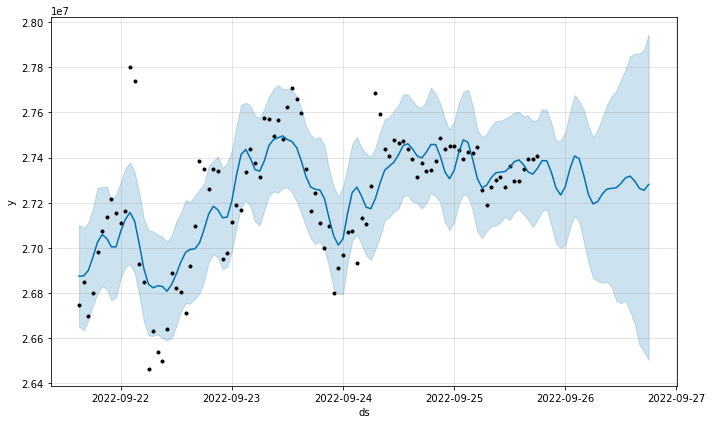

In [40]:
fig1 = model.plot(forecast)

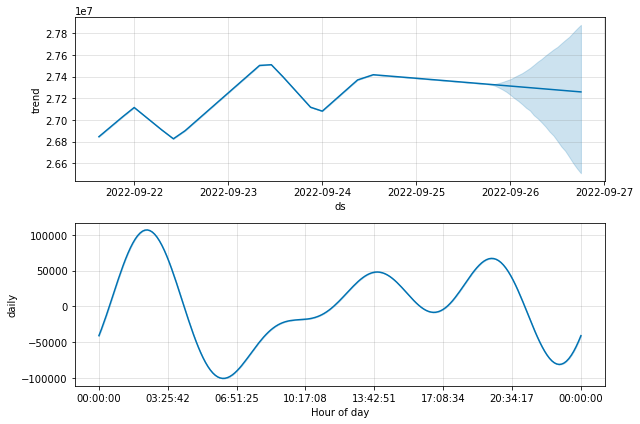

In [41]:
fig2 = model.plot_components(forecast)

In [43]:
import numpy as np

def noise_cleaning(df):
    pass

def find_peak(df):
    size = len(df)
    result = []
    for i in range(1,size-1):
        if (df[i] - df[i-1]) * (df[i+1] - df[i]) < 0:
            result.append(df[i])
    return result


print(type(data['y']))
print(data['y'][0])

<class 'pandas.core.series.Series'>
26746000.0


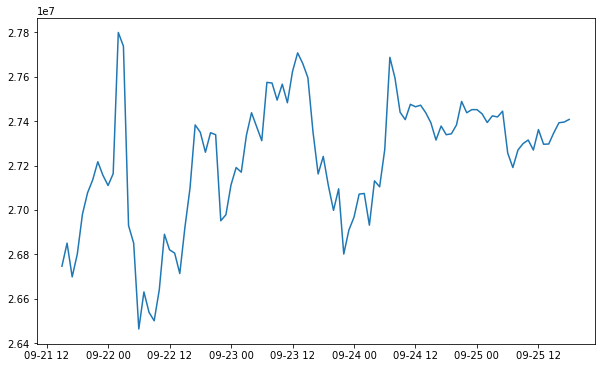

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='w', figsize=(10, 6))
plt.plot(data.ds, data.y)

In [56]:
import pyupbit
import requests

url = "https://api.upbit.com/v1/trades/ticks?market=KRW-BTC&count=10000000"

headers = {"accept": "application/json"}

res = requests.get(url, headers=headers)

json_data = json.loads(res.text)
print(json_data)

[{'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '12:12:46', 'timestamp': 1664107966000, 'trade_price': 27413000.0, 'trade_volume': 0.0359, 'prev_closing_price': 27270000.0, 'change_price': 143000.0, 'ask_bid': 'ASK', 'sequential_id': 1664107966000000}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '12:12:44', 'timestamp': 1664107964000, 'trade_price': 27413000.0, 'trade_volume': 0.1618, 'prev_closing_price': 27270000.0, 'change_price': 143000.0, 'ask_bid': 'ASK', 'sequential_id': 1664107964000000}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '12:12:42', 'timestamp': 1664107962000, 'trade_price': 27413000.0, 'trade_volume': 0.0369, 'prev_closing_price': 27270000.0, 'change_price': 143000.0, 'ask_bid': 'ASK', 'sequential_id': 1664107962000000}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '12:12:40', 'timestamp': 1664107960000, 'trade_price': 27413000.0, 'trade_volume': 0.04227496, '

In [57]:
import pandas as pd
ticks = pd.DataFrame(json_data)
ticks

,market,trade_date_utc,trade_time_utc,timestamp,trade_price,trade_volume,prev_closing_price,change_price,ask_bid,sequential_id
0,KRW-BTC,2022-09-25,12:12:46,1664107966000,27413000.0,0.035900,27270000.0,143000.0,ASK,1664107966000000
1,KRW-BTC,2022-09-25,12:12:44,1664107964000,27413000.0,0.161800,27270000.0,143000.0,ASK,1664107964000000
2,KRW-BTC,2022-09-25,12:12:42,1664107962000,27413000.0,0.036900,27270000.0,143000.0,ASK,1664107962000000
3,KRW-BTC,2022-09-25,12:12:40,1664107960000,27413000.0,0.042275,27270000.0,143000.0,ASK,1664107960000001
4,KRW-BTC,2022-09-25,12:12:40,1664107960000,27413000.0,0.115100,27270000.0,143000.0,ASK,1664107960000000
...,...,...,...,...,...,...,...,...,...,...
495,KRW-BTC,2022-09-25,12:02:51,1664107371000,27386000.0,0.025383,27270000.0,116000.0,ASK,1664107371000000
496,KRW-BTC,2022-09-25,12:02:48,1664107368000,27386000.0,0.020000,27270000.0,116000.0,ASK,1664107368000000
497,KRW-BTC,2022-09-25,12:02:46,1664107366000,27386000.0,0.000666,27270000.0,116000.0,ASK,1664107366000000
498,KRW-BTC,2022-09-25,12:02:43,1664107363000,27386000.0,0.020000,27270000.0,116000.0,ASK,1664107363000002


In [ ]:
ticks.drop(